In [1]:
#notebook purpose: geocode and clean data of two dataframes from 
#https://www.ezview.wa.gov/site/alias__2006/37852/library.aspx
import pathlib
import pandas
import geopandas
import numpy
import shapely

#initialize project pathways
HOME = pathlib.Path().resolve()
DATA_DIR = HOME / 'data'
DATA_EDIT = HOME / 'project'

In [37]:
#open all csv files and asign to variables
businesses = pandas.read_csv(DATA_DIR / "geocoded_businesses.csv", sep=";")
traffic = pandas.read_csv(DATA_DIR / "traffic_counts.csv", sep=";")
rentals = pandas.read_csv(DATA_DIR / "rentals.csv", sep=";")
businesses = businesses[['X', 'Y', 'USER_Company_Name', 'USER_Primary_SIC_Description', 'USER_Location_Employee_Size_Actual']]
businesses.head()

,X,Y,USER_Company_Name,USER_Primary_SIC_Description,USER_Location_Employee_Size_Actual
0,-124.194669,47.194599,Beach Reflections,Hotels & Motels,2
1,-124.203681,47.216664,Navy Getaways-Pacific Beach,Hotels & Motels,7
2,-124.203681,47.216664,Windjammer Restaurant & Lounge,Restaurants,20
3,-124.203681,47.216664,ATM,Atm-Automated Teller Machines,0
4,-124.201990,47.208878,Pacific Beach Hardware Inc,Hardware-Retail,2


In [38]:
#assign geometry to geocoded file
businesses['geometry'] = businesses.apply(lambda col:
                                                shapely.geometry.Point(col['X'], col['Y']),
                                                axis=1)
#filter for relevent columns and convert to geodataframe
geocode_businesses = geopandas.GeoDataFrame(businesses,
                                            geometry = businesses['geometry'],
                                            crs='WGS84')
                                    

<Axes: >

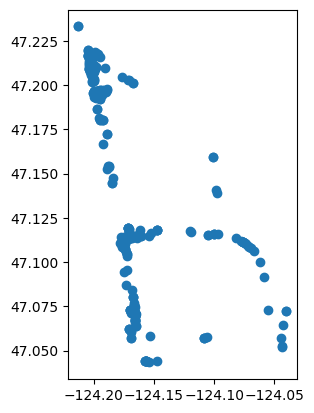

In [39]:
geocode_businesses.plot()